# Data Preparation

- Persiapan library untuk mengolah data

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('population.csv')
df = data.copy()
df.head()

,Year,Yearly % \nChange,Yearly\nChange,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban\nPop %,Urban Population,Country's Share of\nWorld Pop,World Population,India\nGlobal Rank,Population
0,2050,0.23,3711367,NaN,38.1,2.24,551,53.5,876613025,16.84,9735033990,1,1639176033
1,2045,0.35,5585537,-414772.0,36.6,2.24,545,50.1,811749463,17.09,9481803274,1,1620619200
2,2040,0.50,7793541,-415736.0,35.0,2.24,536,46.7,744380367,17.31,9198847240,1,1592691513
3,2035,0.66,10016298,-415732.0,33.3,2.24,523,43.5,675456367,17.48,8887524213,1,1553723810
4,2030,0.80,11726140,-440124.0,31.7,2.24,506,40.4,607341981,17.59,8548487400,1,1503642322


In [3]:
df = df.rename(columns = {'Yearly % \nChange': 'Yearly Change %',
                          'Yearly\nChange' : 'Yearly Change',
                          'Urban\nPop %' : 'Urban Pop %',
                          "Country's Share of\nWorld Pop" : "Country's Share of World Pop",
                          'India\nGlobal Rank' : 'India Global Rank'})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          24 non-null     int64  
 1   Yearly Change %               24 non-null     float64
 2   Yearly Change                 24 non-null     int64  
 3   Migrants (net)                23 non-null     float64
 4   Median Age                    24 non-null     float64
 5   Fertility Rate                24 non-null     float64
 6   Density (P/Km²)               24 non-null     int64  
 7   Urban Pop %                   24 non-null     float64
 8   Urban Population              24 non-null     int64  
 9   Country's Share of World Pop  24 non-null     float64
 10  World Population              24 non-null     object 
 11  India Global Rank             24 non-null     int64  
 12  Population                    24 non-null     int64  
dtypes: floa

In [5]:
df['World Population'].unique()

array(['9735033990', '9481803274', '9198847240', '8887524213',
       '8548487400', '8184437460', '7794798739', '7713468100',
       '7631091040', '7547858925', '7464022049', '7379797139',
       '6956823603', '6541907027', '6143493823', '5744212979',
       '5327231061', '4870921740', '4458003514', '4079480606',
       '3700437046', '3339583597', '3034949748', '2,77,30,19,936'],
      dtype=object)

- perbaiki data dengan cara menghilangkan , dan menganti tipe data

In [6]:
df['World Population'] = df['World Population'].str.replace(',', '')

In [7]:
df['World Population'].astype('int64')

0     9735033990
1     9481803274
2     9198847240
3     8887524213
4     8548487400
5     8184437460
6     7794798739
7     7713468100
8     7631091040
9     7547858925
10    7464022049
11    7379797139
12    6956823603
13    6541907027
14    6143493823
15    5744212979
16    5327231061
17    4870921740
18    4458003514
19    4079480606
20    3700437046
21    3339583597
22    3034949748
23    2773019936
Name: World Population, dtype: int64

In [8]:
df.isna().sum()

Year                            0
Yearly Change %                 0
Yearly Change                   0
Migrants (net)                  1
Median Age                      0
Fertility Rate                  0
Density (P/Km²)                 0
Urban Pop %                     0
Urban Population                0
Country's Share of World Pop    0
World Population                0
India Global Rank               0
Population                      0
dtype: int64

In [9]:
df.fillna(0)

,Year,Yearly Change %,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,India Global Rank,Population
0,2050,0.23,3711367,0.0,38.1,2.24,551,53.5,876613025,16.84,9735033990,1,1639176033
1,2045,0.35,5585537,-414772.0,36.6,2.24,545,50.1,811749463,17.09,9481803274,1,1620619200
2,2040,0.50,7793541,-415736.0,35.0,2.24,536,46.7,744380367,17.31,9198847240,1,1592691513
3,2035,0.66,10016298,-415732.0,33.3,2.24,523,43.5,675456367,17.48,8887524213,1,1553723810
4,2030,0.80,11726140,-440124.0,31.7,2.24,506,40.4,607341981,17.59,8548487400,1,1503642322
5,2025,0.92,13001447,-464081.0,30.0,2.24,486,37.6,542742539,17.66,8184437460,2,1445011620
6,2020,1.04,13970396,-532687.0,28.4,2.24,464,35.0,483098640,17.70,7794798739,2,1380004385
7,2019,1.02,13775474,-532687.0,27.1,2.36,460,34.5,471828295,17.71,7713468100,2,1366417754
8,2018,1.04,13965495,-532687.0,27.1,2.36,455,34.1,460779764,17.73,7631091040,2,1352642280
9,2017,1.07,14159536,-532687.0,27.1,2.36,450,33.6,449963381,17.74,7547858925,2,1338676785


In [10]:
df.duplicated().sum()

0

[Text(0, 0, 'Year'),
 Text(1, 0, 'Yearly Change %'),
 Text(2, 0, 'Yearly Change'),
 Text(3, 0, 'Migrants (net)'),
 Text(4, 0, 'Median Age'),
 Text(5, 0, 'Fertility Rate'),
 Text(6, 0, 'Density (P/Km²)'),
 Text(7, 0, 'Urban Pop %'),
 Text(8, 0, 'Urban Population'),
 Text(9, 0, "Country's Share of World Pop"),
 Text(10, 0, 'India Global Rank'),
 Text(11, 0, 'Population')]

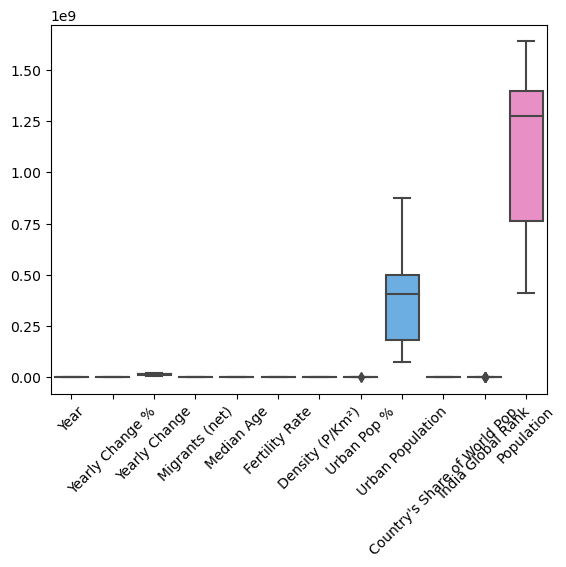

In [11]:
out = sns.boxplot(data=df)
out.set_xticklabels(out.get_xticklabels(),rotation = 45)

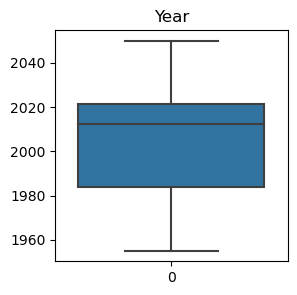

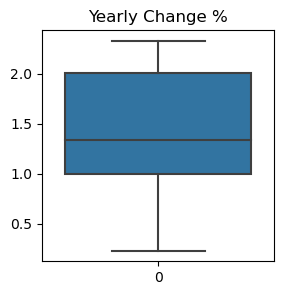

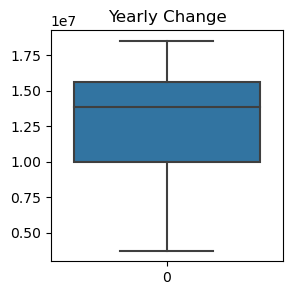

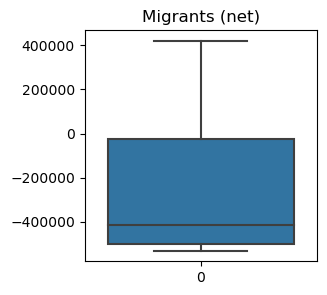

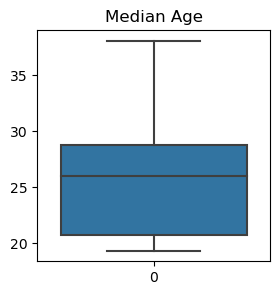

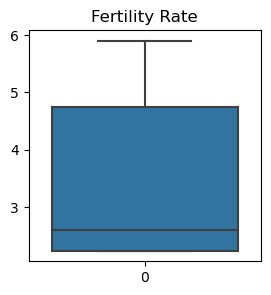

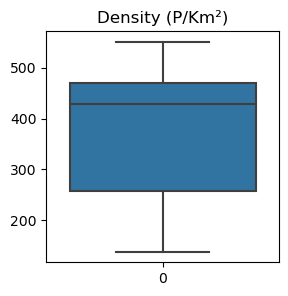

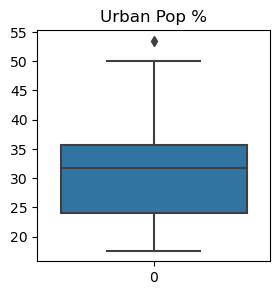

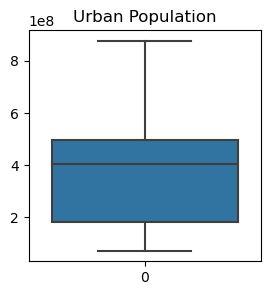

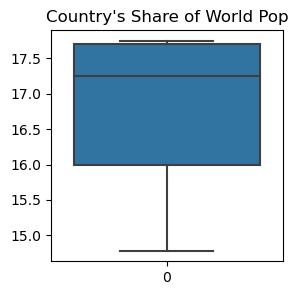

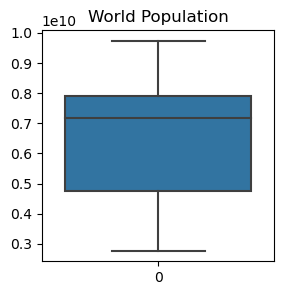

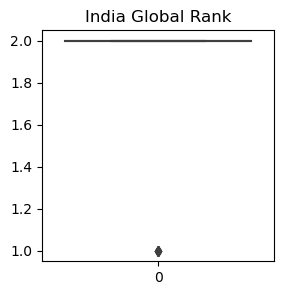

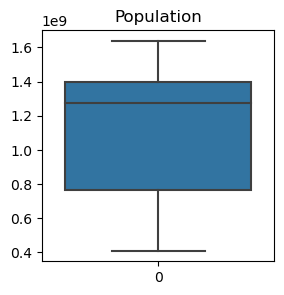

In [12]:
for column in df.columns:
    plt.figure(figsize = (3,3))
    sns.boxplot(df[column])
    plt.title(column)
plt.show()

# EDA

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Yearly Change %'}>,
        <Axes: title={'center': 'Yearly Change'}>],
       [<Axes: title={'center': 'Migrants (net)'}>,
        <Axes: title={'center': 'Median Age'}>,
        <Axes: title={'center': 'Fertility Rate'}>],
       [<Axes: title={'center': 'Density (P/Km²)'}>,
        <Axes: title={'center': 'Urban Pop %'}>,
        <Axes: title={'center': 'Urban Population'}>],
       [<Axes: title={'center': "Country's Share of World Pop"}>,
        <Axes: title={'center': 'India Global Rank'}>,
        <Axes: title={'center': 'Population'}>]], dtype=object)

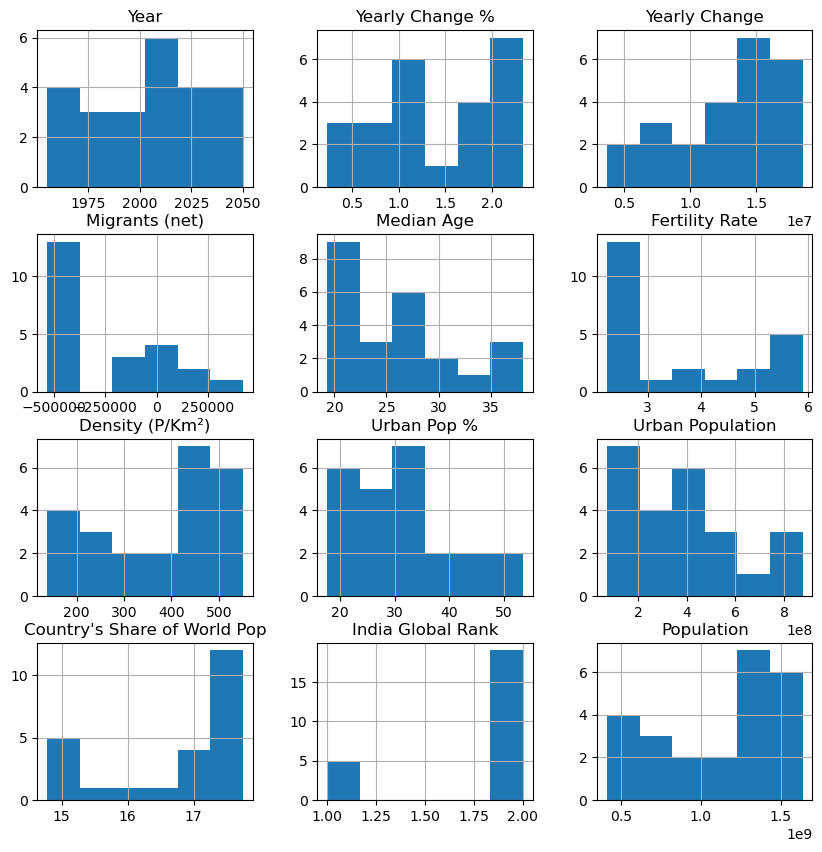

In [13]:
df.hist(figsize=(10,10), bins='auto')

<Axes: >

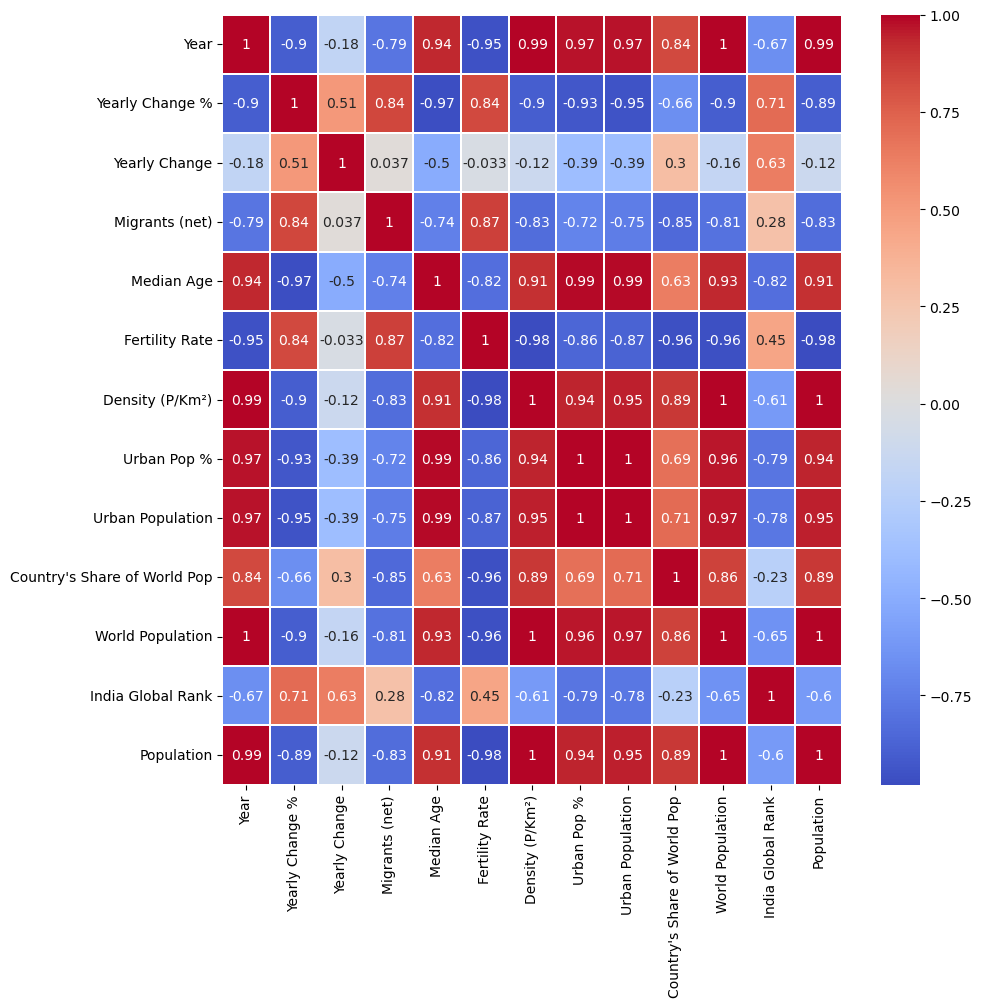

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True, cmap= 'coolwarm', linewidths = 0.2)

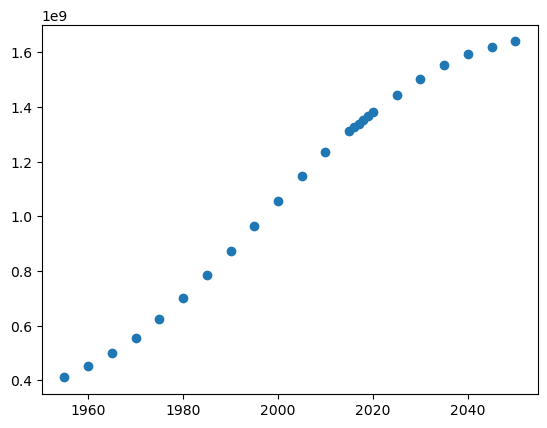

In [15]:
plt.scatter(data['Year'], data.Population)
plt.show()

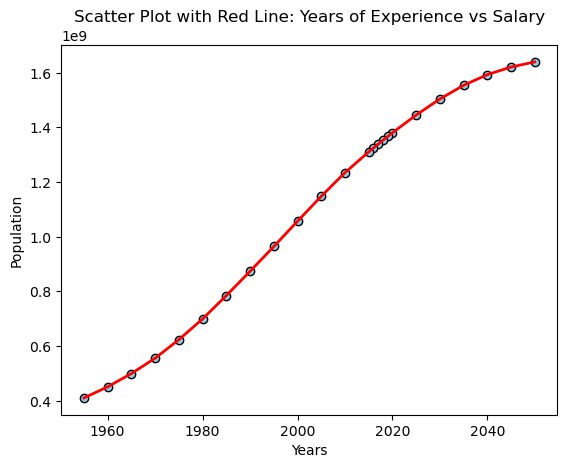

In [16]:
# Membuat scatter plot dengan YearsExperience sebagai sumbu x dan Salary sebagai sumbu y
plt.scatter(df['Year'], df['Population'], color='skyblue', edgecolor='black')

# Menambahkan garis dengan warna merah
plt.plot(df['Year'], df['Population'], color='red', linestyle='-', linewidth=2)

# Menambahkan label dan judul
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Scatter Plot with Red Line: Years of Experience vs Salary')

# Menampilkan scatter plot
plt.show()


# Modeling

- Feature Scaling

In [17]:
df = df[['Year', 'Population']]

In [18]:
column = 'Population'
min_value = df[column].min()
max_value = df[column].max()


df[column] = (df[column] - min_value) / (max_value - min_value)
# column = 'Year'
# min_value = df[column].min()
# max_value = df[column].max()


# df[column] = (df[column] - min_value) / (max_value - min_value)
df.head()

,Year,Population
0,2050,1.000000
1,2045,0.984904
2,2040,0.962186
3,2035,0.930487
4,2030,0.889747


In [44]:
# Train Test split -> 0.3 / random_state

# Mengacak indeks data
np.random.seed(5)  # atur seed untuk reproduktibilitas
indices = np.random.permutation(df.index)

# Hitung jumlah data untuk training set (70%) dan test set (30%)
train_size = int(0.7 * len(df))

# Bagi data menjadi training set dan test set
train_data = df.loc[indices[:train_size]]
test_data = df.loc[indices[train_size:]]

# Cek ukuran setelah pembagian
print("Ukuran train_data:", train_data.shape)
print("Ukuran test_data:", test_data.shape)

Ukuran train_data: (16, 2)
Ukuran test_data: (8, 2)


In [45]:
# Pilih kolom yang ingin digunakan untuk prediksi di set pelatihan
X_train = train_data['Year']
y_train = train_data['Population']

# Pilih kolom yang ingin digunakan untuk prediksi di set pengujian
X_test = test_data['Year']
y_test = test_data['Population']

# Definisi fungsi R-squared Score secara manual
def r2_score_manual(y_true, y_pred):
    mean_y = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y)**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

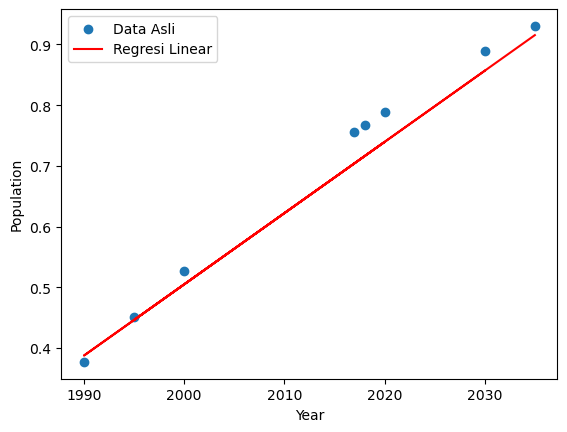

Train R-squared Score: 0.9855189731135232
Test R-squared Score: 0.9678459108344801


In [54]:
def linear_regression(x, y):
    n = len(x)
    
    # Hitung nilai rata-rata x dan y
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Hitung slope (m) dan intercept (b) menggunakan rumus
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean)**2)
    
    m = numerator / denominator
    b = y_mean - m * x_mean

    return m, b

# Hitung slope (m) dan intercept (b) dari data contoh
slope, intercept = linear_regression(X_train, y_train)

# Fungsi prediksi
def predict(x, m, b):
    return m * x + b

# Prediksi nilai population untuk setiap tahun
test_population_pred = predict(X_test, slope, intercept)
train_population_pred = predict(X_train, slope, intercept)

# Plot data asli dan garis regresi linear
plt.scatter(X_test, y_test, label='Data Asli')
plt.plot(X_test, population_pred, label='Regresi Linear', color='red')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

# Menghitung R-squared Score pada data train
train_score = r2_score_manual(y_train, train_population_pred)
print(f"Train R-squared Score: {train_score}")


# Melakukan prediksi pada set pengujian
test_score = r2_score_manual(y_test, test_population_pred)
print(f"Test R-squared Score: {test_score}")